QSAR Model Building of betalactamoose Inhibitors

Data Professor YouTube channel, http://youtube.com/dataprofessor

Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = '/content/drive/MyDrive/Colab Notebooks/data (1)/nspdengue_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.187087
1155,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.987163
1156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
1157,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1155,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1157,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1154    5.187087
1155    4.987163
1156    5.795880
1157    5.508638
1158    5.036212
Name: pIC50, Length: 1159, dtype: float64

Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
1155,1,1,1,0,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
1156,1,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
1157,1,1,1,0,0,0,0,0,1,1,...,1,0,1,1,0,1,1,0,1,0


In [6]:
X.to_csv('/content/descriptor_list.csv', index = False)

# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8912182411694844

Model prediction

In [9]:
Y_pred = model.predict(X)
Y_pred

array([4.2344914 , 4.79415035, 4.12482209, ..., 5.61712727, 5.26012074,
       4.92466693])

In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.02
Coefficient of determination (R^2): 0.89


Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

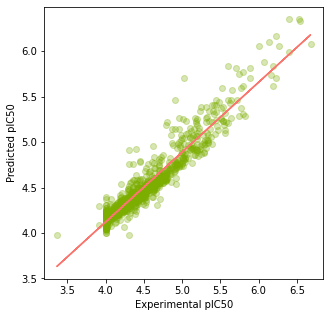

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

Save Model as Pickle Object

In [13]:
import pickle

In [14]:
pickle.dump(model, open('dengueprotein_model.pkl', 'wb'))